# Project Chronic_Kidney_Disease

[Chronic_Kidney_Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

### Introduction

> Chronic kidney disease is one of the most common diseases facing humans, as well as one of the most dangerous. This disease is defined as a long-term condition in which the kidneys do not work as they should. It is a common condition often associated with aging. It can infect anyone, but it is more common in most countries such as those in South Asia.

> We used data containing features for reasons that indicate chronic kidney disease. We used machine learning algorithms to help classify the person with or without this disease.

### Loading the librarys

In [1]:
import os
os.chdir('../')
!dir

 Volume in drive D is New Volume
 Volume Serial Number is CA8A-7B58

 Directory of D:\test\Basic_Python\Suresh Interview Project\Project Kidney Disease

26-09-2022  20:39    <DIR>          .
26-09-2022  20:39    <DIR>          ..
05-06-2022  16:56               258 Create a Virtual env.txt
26-09-2022  20:36    <DIR>          Dataset
26-09-2022  20:34    <DIR>          Documents
29-08-2022  21:35                32 Notes.txt
26-09-2022  20:38                96 requirement.txt
26-09-2022  20:45    <DIR>          Research
               3 File(s)            386 bytes
               5 Dir(s)  74,366,722,048 bytes free


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# to read .arff files
from scipy.io import arff

import warnings
warnings.filterwarnings('ignore')

# display all the columns of the dataframes
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Dataset/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# show shape of dataset
df.shape

(400, 26)

In [5]:
# describe the dataset
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
# show information a bout data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [8]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

# we can show the data after made convert for unssesary columns to numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# looking at unique values
for col in df.columns:
    print(f"{col} has {df[col].unique()} | \n{len(df[col].unique())} values\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] | 
77 values

blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] | 
11 values

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] | 
6 values

albumin has [ 1.  4.  2.  3.  0. nan  5.] | 
7 values

sugar has [ 0.  3.  4.  1. nan  2.  5.] | 
7 values

red_blood_cells has [nan 'normal' 'abnormal'] | 
3 values

pus_cell has ['normal' 'abnormal' nan] | 
3 values

pus_cell_clumps has ['notpresent' 'present' nan] | 
3 values

bacteria has ['notpresent' 'present' nan] | 
3 values

blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.

In [11]:
# make a replace for incorect value 

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

# ckd == 0 and not ckd == 1
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [12]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} | \n{len(df[col].unique())} values\n")

diabetes_mellitus has ['yes' 'no' nan] | 
3 values

coronary_artery_disease has ['no' 'yes' nan] | 
3 values

class has [0 1] | 
2 values



### Plot to show the data 

In [13]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [14]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



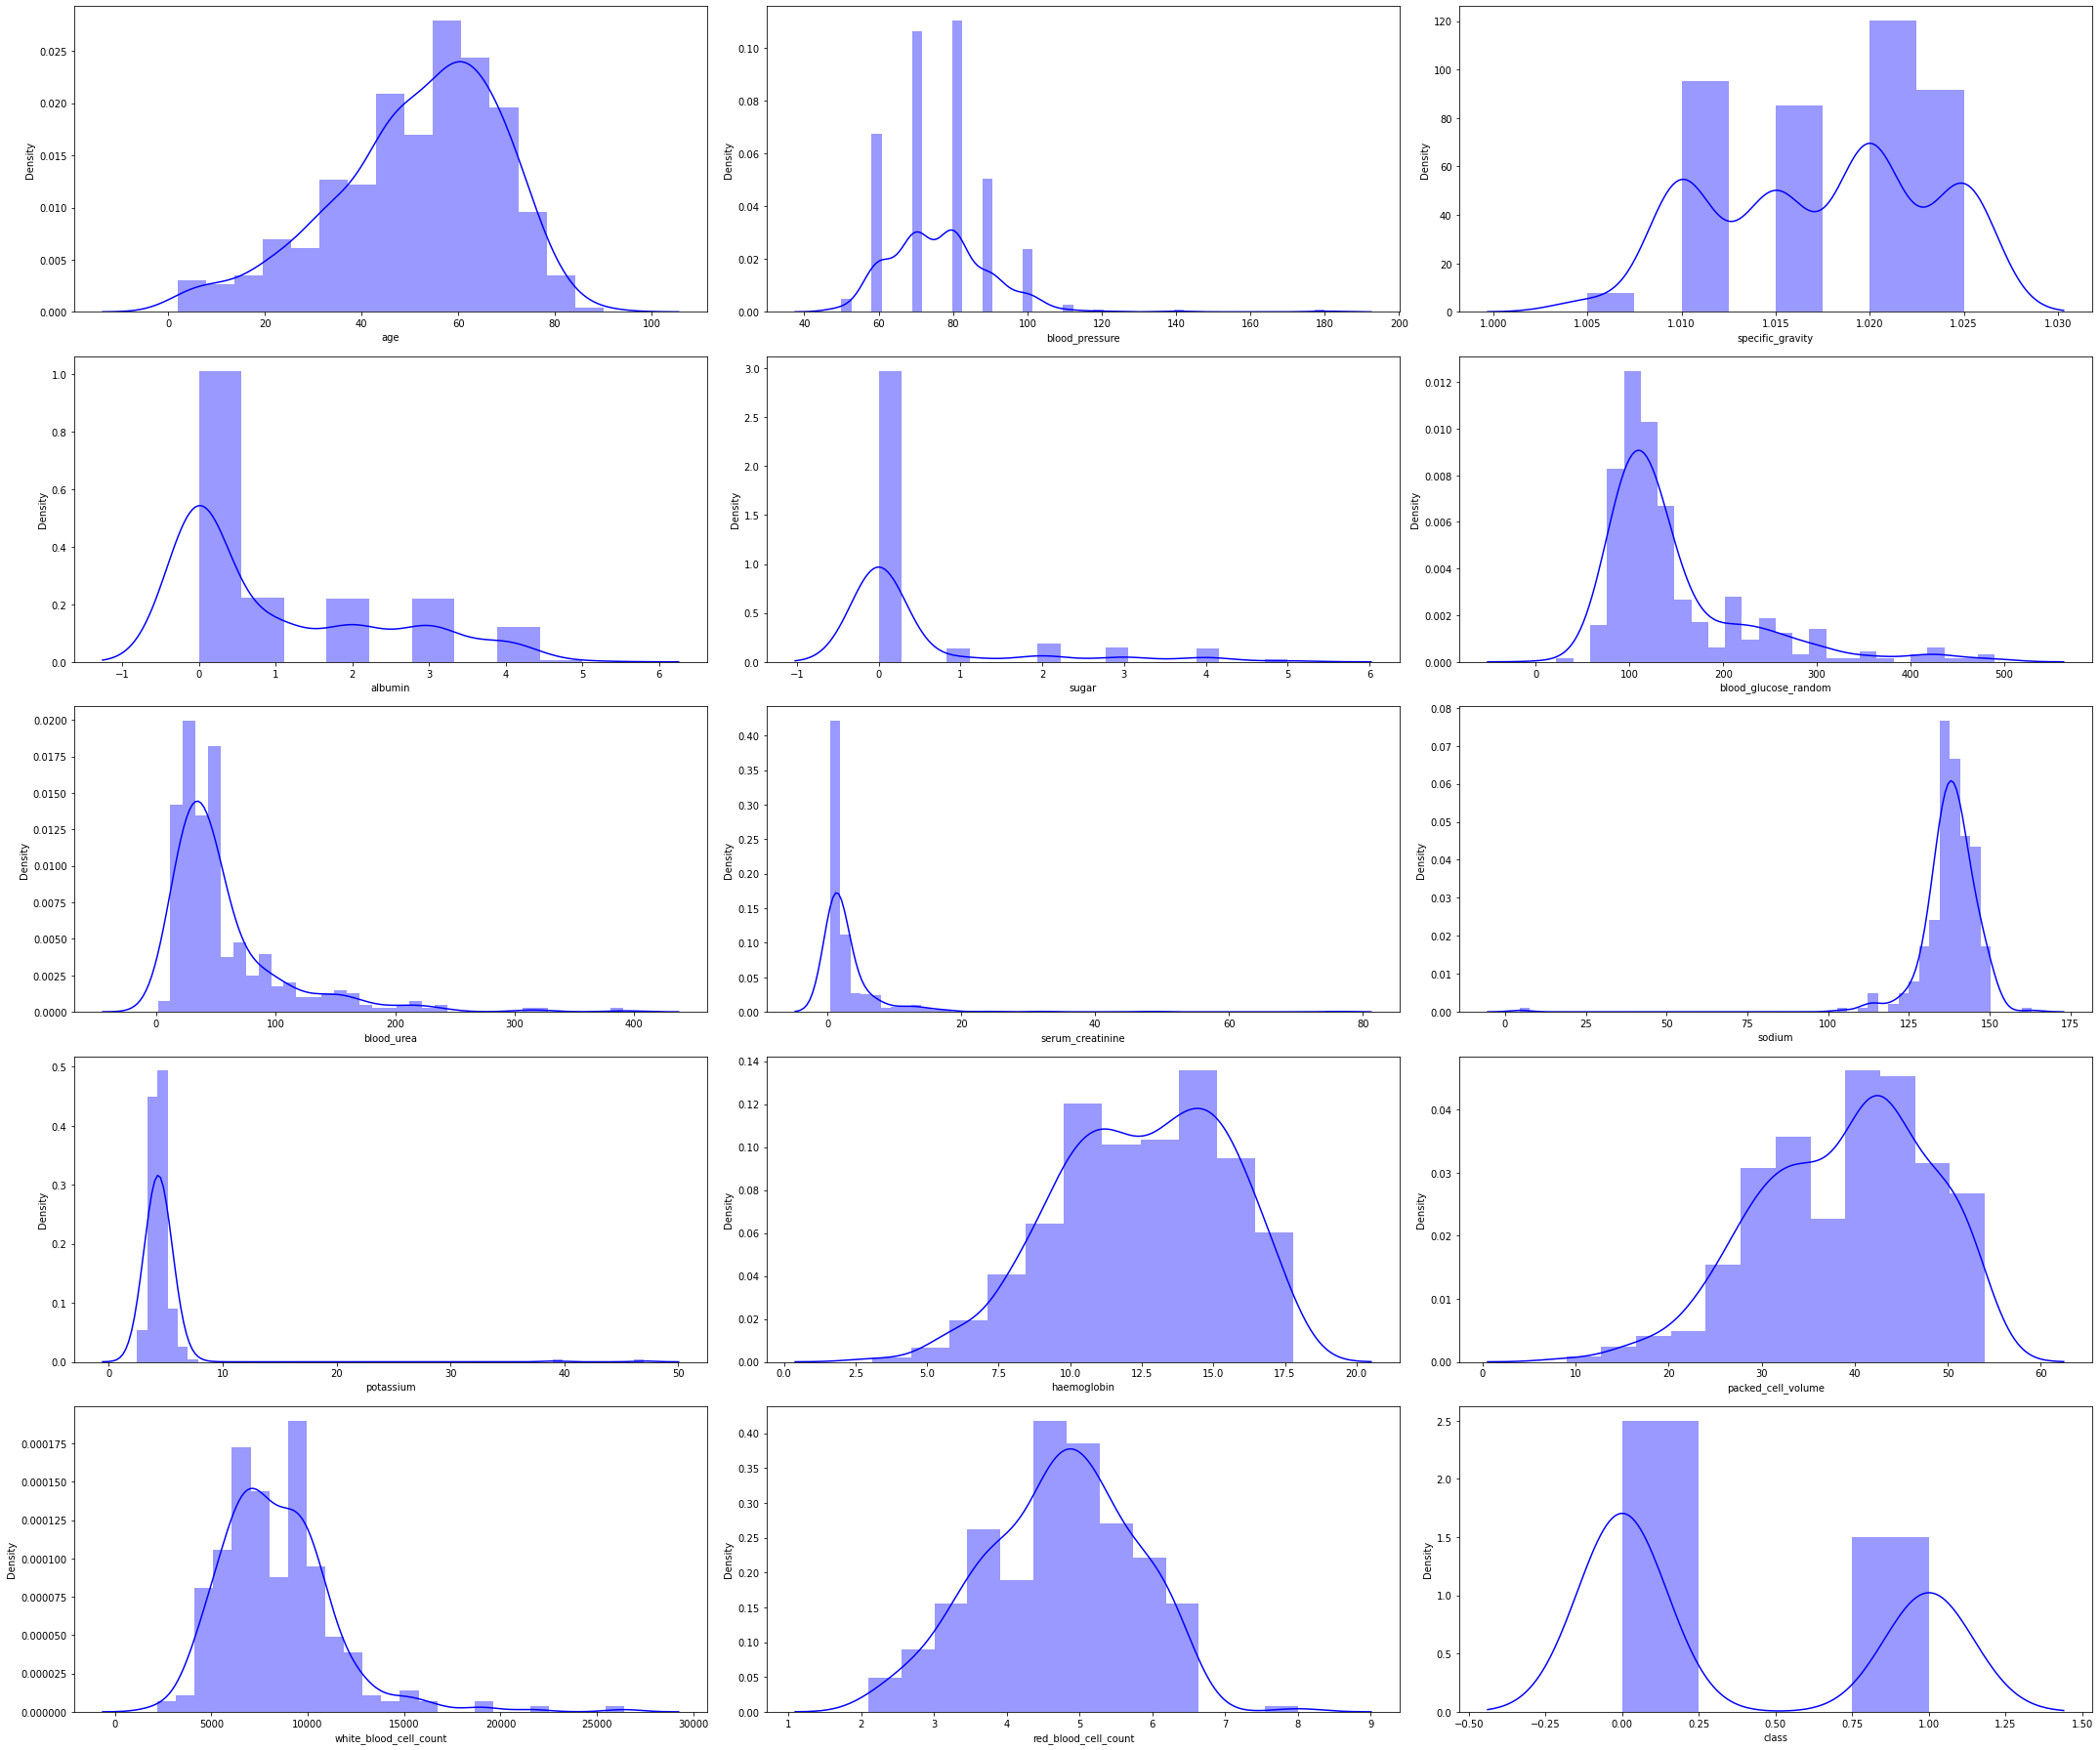

In [17]:
# checking numerical features distribution
plt.figure(figsize = (30, 25))
plotnumber = 1
for column in num_cols:
    if plotnumber <= len(num_cols): # 14:
        ax = plt.subplot(5, 3, plotnumber)
        sns.distplot(df[column], color='blue')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

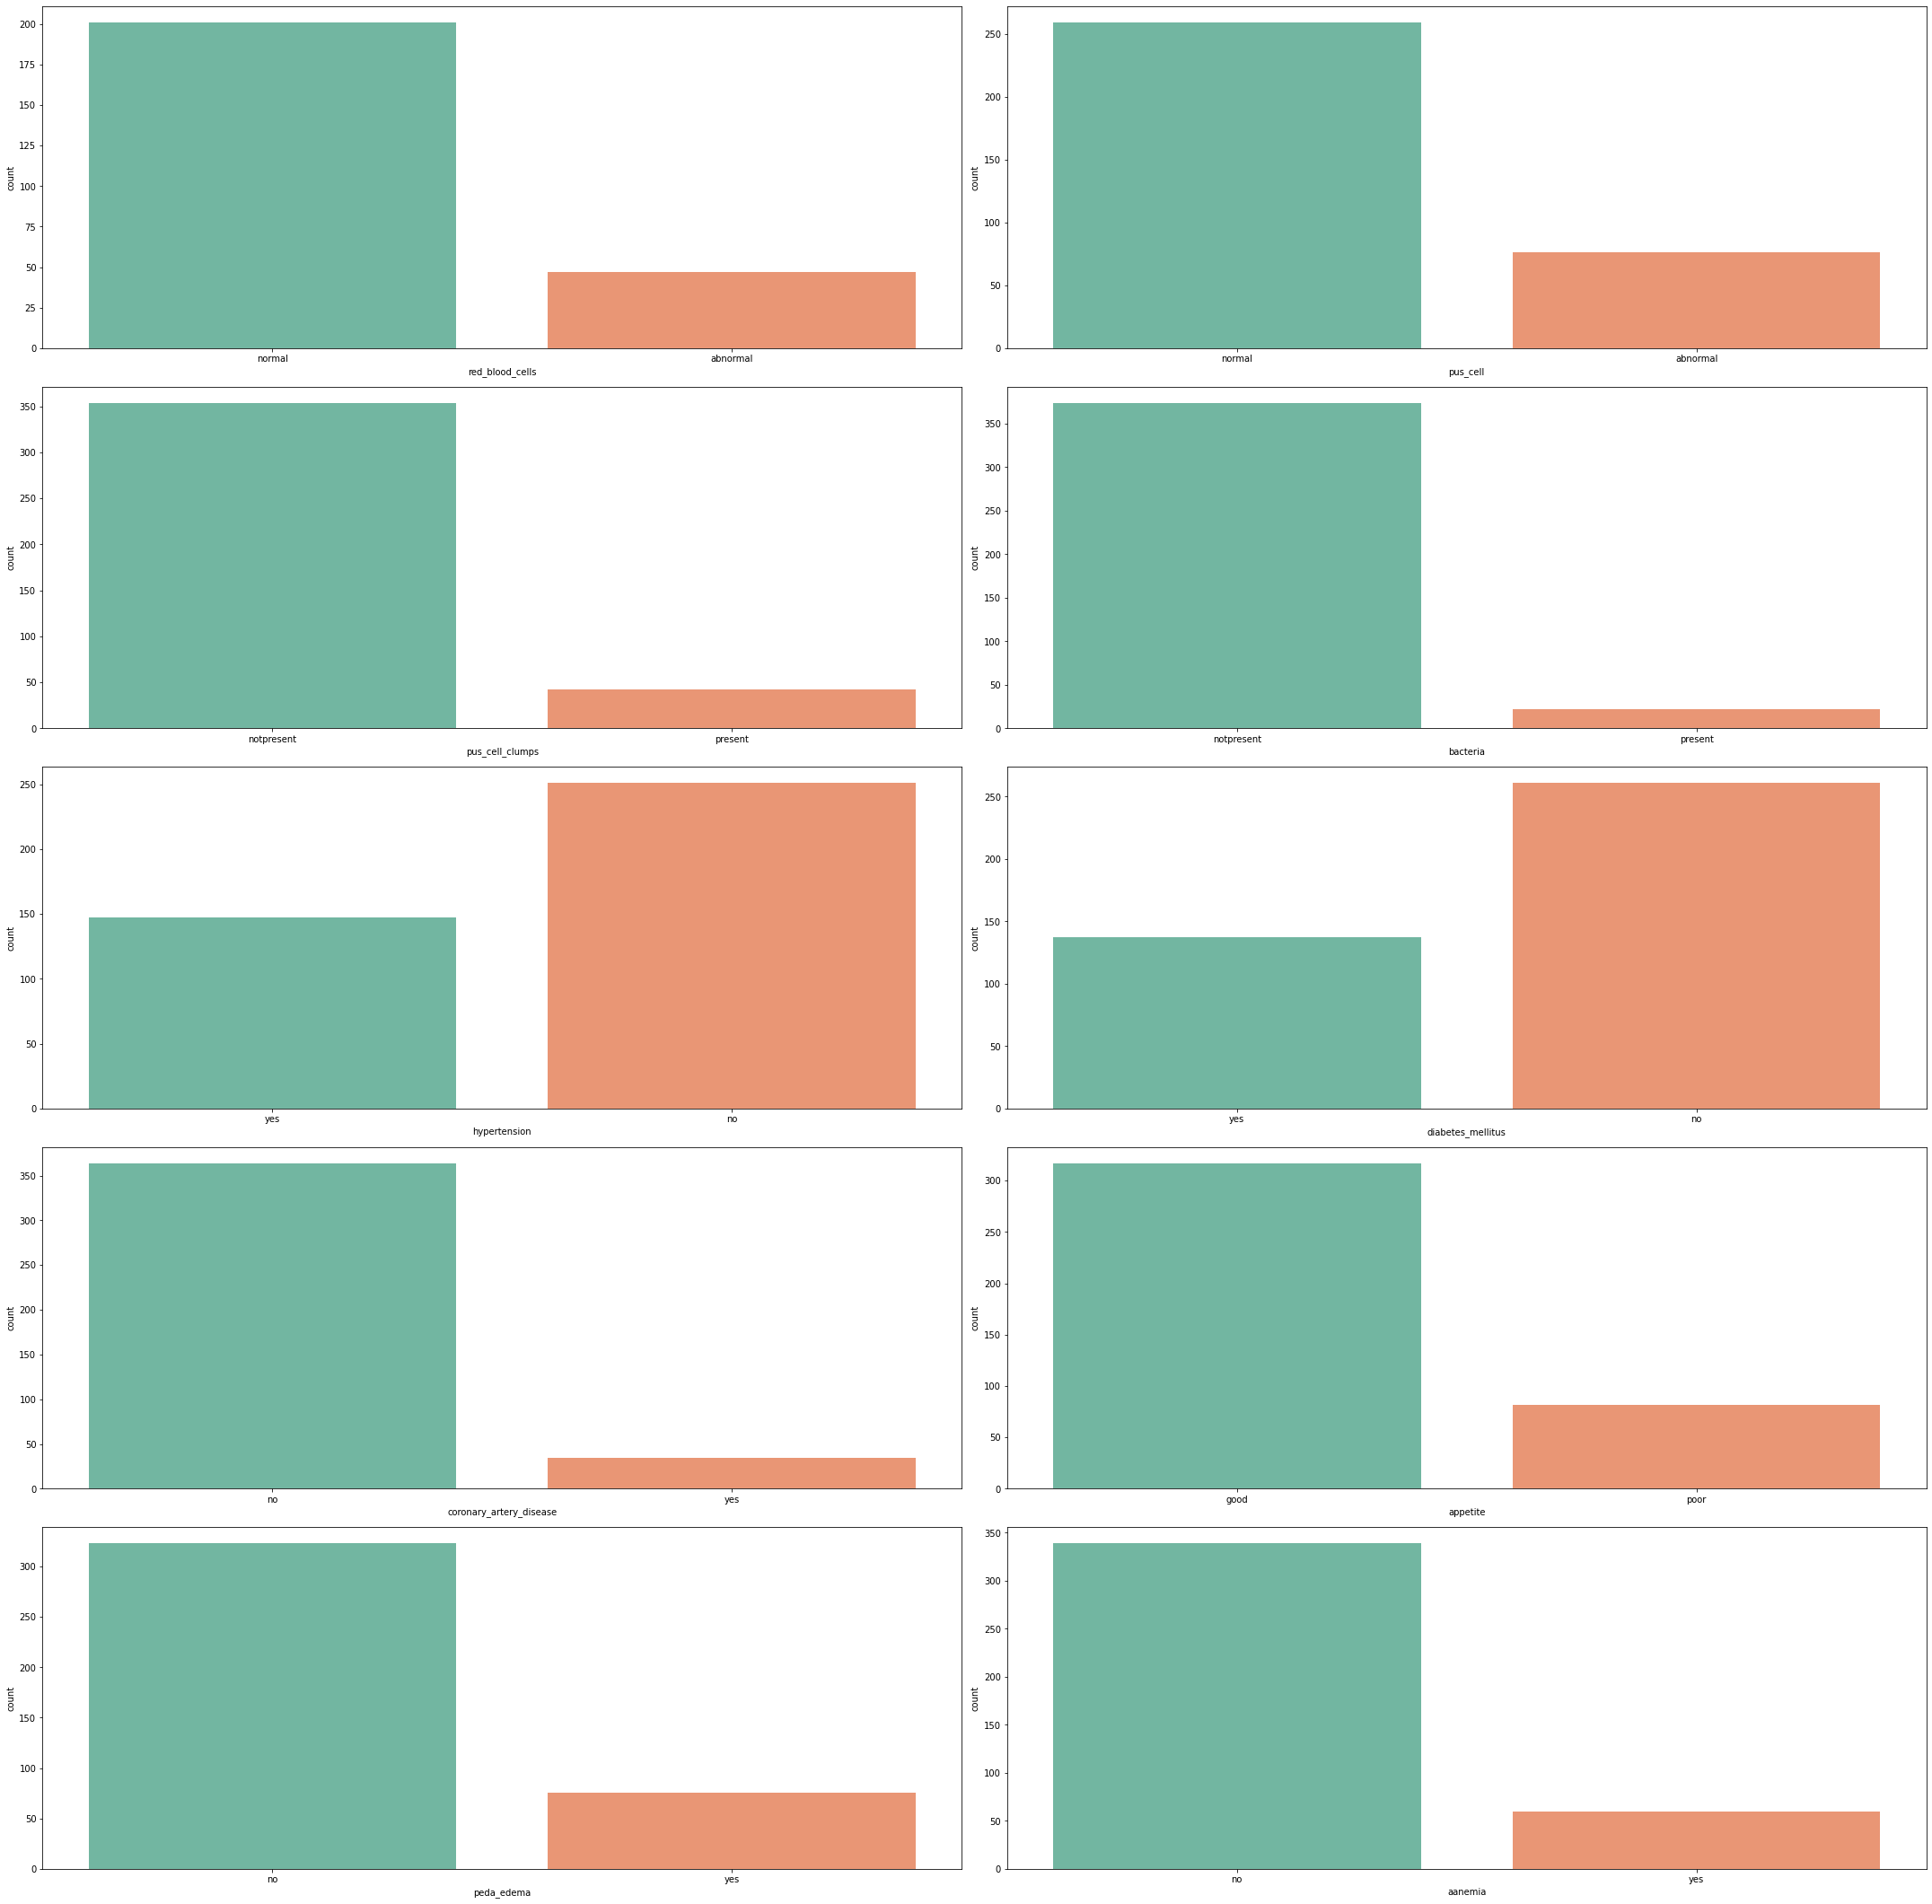

In [20]:
# looking at categorical columns

plt.figure(figsize = (30, 35))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= len(cat_cols): # 11:
        ax = plt.subplot(6, 2, plotnumber)
        sns.countplot(df[column], palette = 'Set2', color='black')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

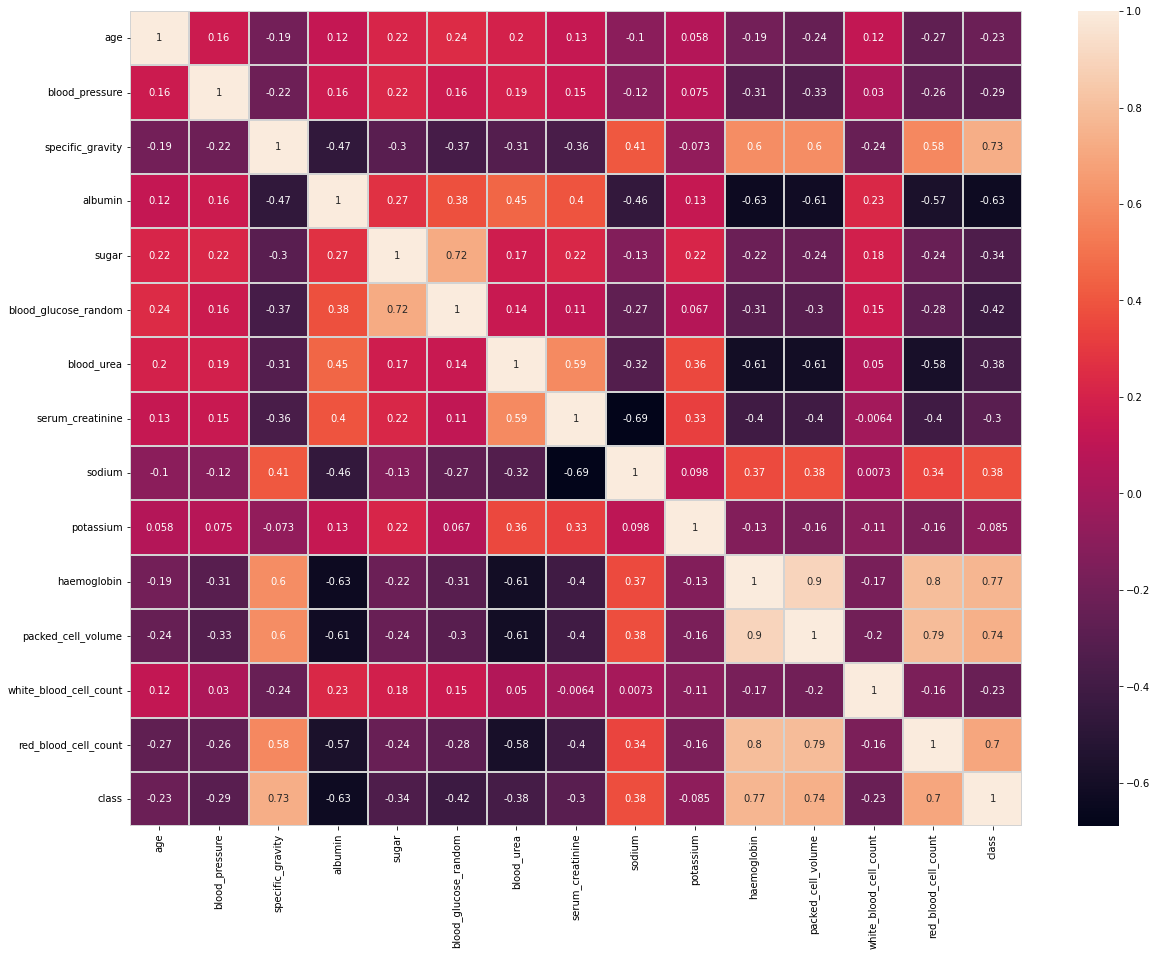

In [21]:
# Calculation the crro
cor=df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, linewidths = 1, linecolor = 'lightgrey')
plt.show()

In [24]:
px.scatter(df, x="age", y="blood_pressure", color="class")

In [25]:
px.scatter(df, x="age", y="sugar", color="class")

In [26]:
px.scatter(df, x="age", y="haemoglobin", color="class", marginal_y="violin", marginal_x="box")

In [27]:
px.scatter(df, x="age", y="bacteria", color="class", marginal_y="violin", marginal_x="box")

In [28]:
px.violin(df, y="age", x="sugar", color="class", box=True, points="all")

In [29]:
px.scatter_3d(df, x='age', y='hypertension', z='sugar', color='class')

### Data processing

In [30]:
# checking for null values and correct it

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
aanemia                      1
appetite                     1
peda_edema                   1
class                        0
dtype: int64

In [31]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [32]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [33]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [34]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [35]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

### Feature Encoding

In [36]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



### Since all of our columns have two classes, we can use the label encoder

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,150.0,3.8,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,150.0,18.0,0.8,134.0,5.2,11.3,38.0,6000.0,3.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,142.0,3.7,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,136.0,3.2,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


### Using the machien Learning model

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import pickle

In [39]:
# data splitting in X,y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [40]:
print("The shape of X_train",X_train.shape)
print("The shape of X_test",X_test.shape)
print("The shape of X_train",y_train.shape)
print("The shape of X_test",y_test.shape)

The shape of X_train (280, 24)
The shape of X_test (120, 24)
The shape of X_train (280,)
The shape of X_test (120,)


### Random Forest Classifier

In [41]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [46]:
print('model_RF Train Score is : ' , classifier.score(X_train, y_train))
print('model_RF Test Score is : ' , classifier.score(X_test, y_test))

model_RF Train Score is :  1.0
model_RF Test Score is :  0.9916666666666667


Accuracy_score: 99.17 %
Loss: 0.83 %
Cohen_kappa_score: 98.2 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

confusion_matrix:
 [[76  0]
 [ 1 43]]


<AxesSubplot:>

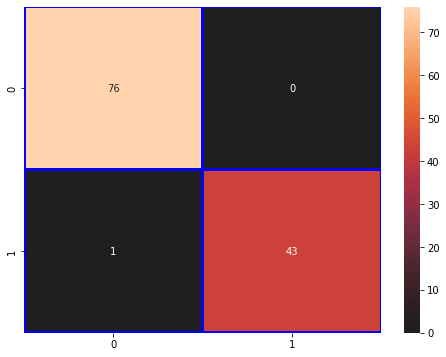

In [47]:
print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')

print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')

print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')

print("Classification_report:\n",metrics.classification_report(y_test, y_pred))

# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))


fig, ax = plt.subplots()
fig.set_size_inches(8,6) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True,
                 linewidths = 2,
                linecolor = "blue",
                center=0)

In [48]:
X_test.columns, X_test.iloc[0,:].values

(Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
        'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
        'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
        'potassium', 'haemoglobin', 'packed_cell_volume',
        'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
        'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
        'peda_edema', 'aanemia'],
       dtype='object'),
 array([1.90e+01, 7.00e+01, 1.02e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 8.10e+01, 8.70e+01, 3.30e+00,
        1.35e+02, 4.10e+00, 1.15e+01, 3.00e+01, 6.90e+03, 6.20e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]))

In [49]:
y_pred = classifier.predict([X_test.iloc[0,:].values])
y_pred

array([0], dtype=int64)

In [50]:
y_test.iloc[0]

0

In [51]:
X_test.iloc[0,:]

age                          19.00
blood_pressure               70.00
specific_gravity              1.02
albumin                       0.00
sugar                         0.00
red_blood_cells               0.00
pus_cell                      1.00
pus_cell_clumps               0.00
bacteria                      0.00
blood_glucose_random         81.00
blood_urea                   87.00
serum_creatinine              3.30
sodium                      135.00
potassium                     4.10
haemoglobin                  11.50
packed_cell_volume           30.00
white_blood_cell_count     6900.00
red_blood_cell_count          6.20
hypertension                  0.00
diabetes_mellitus             0.00
coronary_artery_disease       0.00
appetite                      0.00
peda_edema                    0.00
aanemia                       0.00
Name: 209, dtype: float64

In [52]:
input_list = np.array([27,60,1.009,2,2,1,1,0,0,42,102,45,5.5,10,10,25,2500,3.6,0,0,0,0,0,0])

y_pred = classifier.predict([input_list])
y_pred

array([0], dtype=int64)

In [53]:
# save the model to disk
filename = 'rf_Classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [54]:
X_test.columns, X_test.iloc[1,:].values

(Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
        'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
        'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
        'potassium', 'haemoglobin', 'packed_cell_volume',
        'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
        'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
        'peda_edema', 'aanemia'],
       dtype='object'),
 array([4.70e+01, 8.00e+01, 1.01e+00, 0.00e+00, 3.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 9.30e+01, 3.30e+01, 9.00e-01,
        1.44e+02, 4.50e+00, 1.33e+01, 5.20e+01, 8.10e+03, 5.20e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]))

In [55]:
X_test.iloc[1,:], y_test.iloc[1]

(age                          47.00
 blood_pressure               80.00
 specific_gravity              1.01
 albumin                       0.00
 sugar                         3.00
 red_blood_cells               1.00
 pus_cell                      1.00
 pus_cell_clumps               0.00
 bacteria                      0.00
 blood_glucose_random         93.00
 blood_urea                   33.00
 serum_creatinine              0.90
 sodium                      144.00
 potassium                     4.50
 haemoglobin                  13.30
 packed_cell_volume           52.00
 white_blood_cell_count     8100.00
 red_blood_cell_count          5.20
 hypertension                  0.00
 diabetes_mellitus             0.00
 coronary_artery_disease       0.00
 appetite                      0.00
 peda_edema                    0.00
 aanemia                       0.00
 Name: 280, dtype: float64,
 1)